In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings

import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

cluster_data_df = pd.read_csv(r"C:\Users\Tombra\Desktop\mini-project-III\cluster_data.csv", sep=",")

cluster_data_df

,cust_id,avg(amount/tran),credit_balance,savings_balance,checking_balance,income,age,years_with_bank,nbr_children,gender,city_name
0,1362480,269.266706,20.00,1187.97,86.86,50890,33,3,2,M,New York City
1,1362484,381.386000,369.72,2122.17,95.32,10053,42,2,0,F,Denver
2,1362485,278.479306,1100.00,0.00,45.49,22690,25,4,0,F,New York City
3,1362486,98.289600,0.00,116.24,3312.27,10701,76,6,0,F,Dallas
4,1362487,211.563389,1548.23,12.89,1401.21,6605,71,1,0,M,Los Angeles
...,...,...,...,...,...,...,...,...,...,...,...
637,1363486,0.000000,1.00,0.00,0.00,39942,41,1,5,F,Honolulu
638,1363490,2.853333,0.00,2301.53,0.00,0,15,7,0,F,Honolulu
639,1363492,1103.970502,6869.00,1116.10,106.14,142274,54,4,0,M,Dallas
640,1363493,147.857778,1.00,553.61,2053.90,30068,69,5,0,M,Houston


In [2]:
# Drop avg,credit_balance, savings_balance,checking_balance
demo_data = cluster_data_df.drop(columns=['avg(amount/tran)', 'credit_balance', 'savings_balance', 'checking_balance'])
demo_data

,cust_id,income,age,years_with_bank,nbr_children,gender,city_name
0,1362480,50890,33,3,2,M,New York City
1,1362484,10053,42,2,0,F,Denver
2,1362485,22690,25,4,0,F,New York City
3,1362486,10701,76,6,0,F,Dallas
4,1362487,6605,71,1,0,M,Los Angeles
...,...,...,...,...,...,...,...
637,1363486,39942,41,1,5,F,Honolulu
638,1363490,0,15,7,0,F,Honolulu
639,1363492,142274,54,4,0,M,Dallas
640,1363493,30068,69,5,0,M,Houston


In [3]:
df_encoded = pd.get_dummies(demo_data, prefix=None, columns=['city_name'])
df_encoded = pd.get_dummies(df_encoded, columns=['gender'], drop_first=True) #binary
df_encoded.head()

,cust_id,income,age,years_with_bank,nbr_children,city_name_Albuquerque,city_name_Anaheim,city_name_Arlington,city_name_Atlanta,city_name_Austin,...,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita,gender_M
0,1362480,50890,33,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1362484,10053,42,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1362485,22690,25,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1362486,10701,76,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1362487,6605,71,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
#Scale
scaler = StandardScaler().set_output(transform="pandas")
df_scaled = scaler.fit_transform(df_encoded)
df_scaled.head()

,cust_id,income,age,years_with_bank,nbr_children,city_name_Albuquerque,city_name_Anaheim,city_name_Arlington,city_name_Atlanta,city_name_Austin,...,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita,gender_M
0,-1.713821,1.303330,-0.505884,-0.303070,1.180344,-0.104993,-0.119239,-0.039498,-0.055902,-0.125789,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,1.188921
1,-1.700297,-0.580153,-0.028816,-0.674388,-0.632529,-0.104993,-0.119239,-0.039498,-0.055902,-0.125789,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
2,-1.696916,0.002690,-0.929945,0.068249,-0.632529,-0.104993,-0.119239,-0.039498,-0.055902,-0.125789,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
3,-1.693535,-0.550266,1.773444,0.810885,-0.632529,-0.104993,-0.119239,-0.039498,-0.055902,-0.125789,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
4,-1.690154,-0.739182,1.508406,-1.045707,-0.632529,-0.104993,-0.119239,-0.039498,-0.055902,-0.125789,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,1.188921


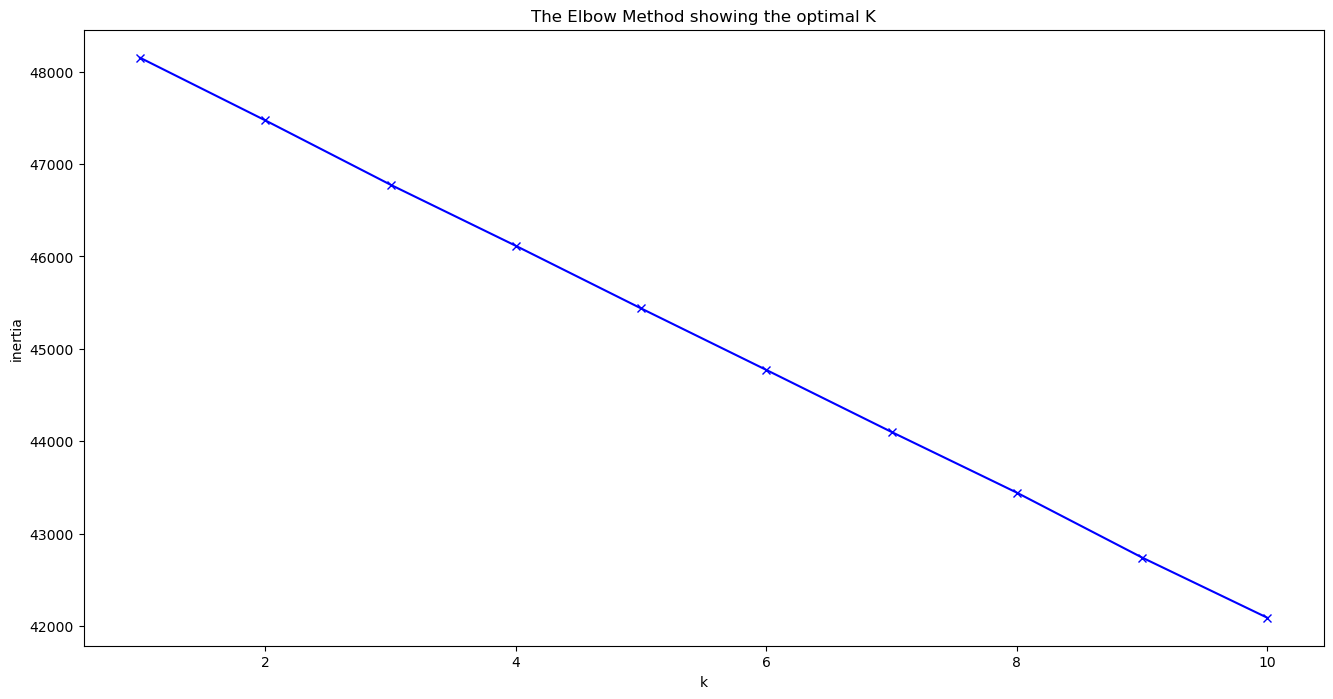

In [5]:
#elbow method KMeans
inertias = []
K = range(1,11) #run K-means with K ranging from 1 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    inertias.append(kmeanModel.inertia_)
    
# plot elbow method
plt.figure(figsize=(16,8))
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.title('The Elbow Method showing the optimal K')
plt.show()

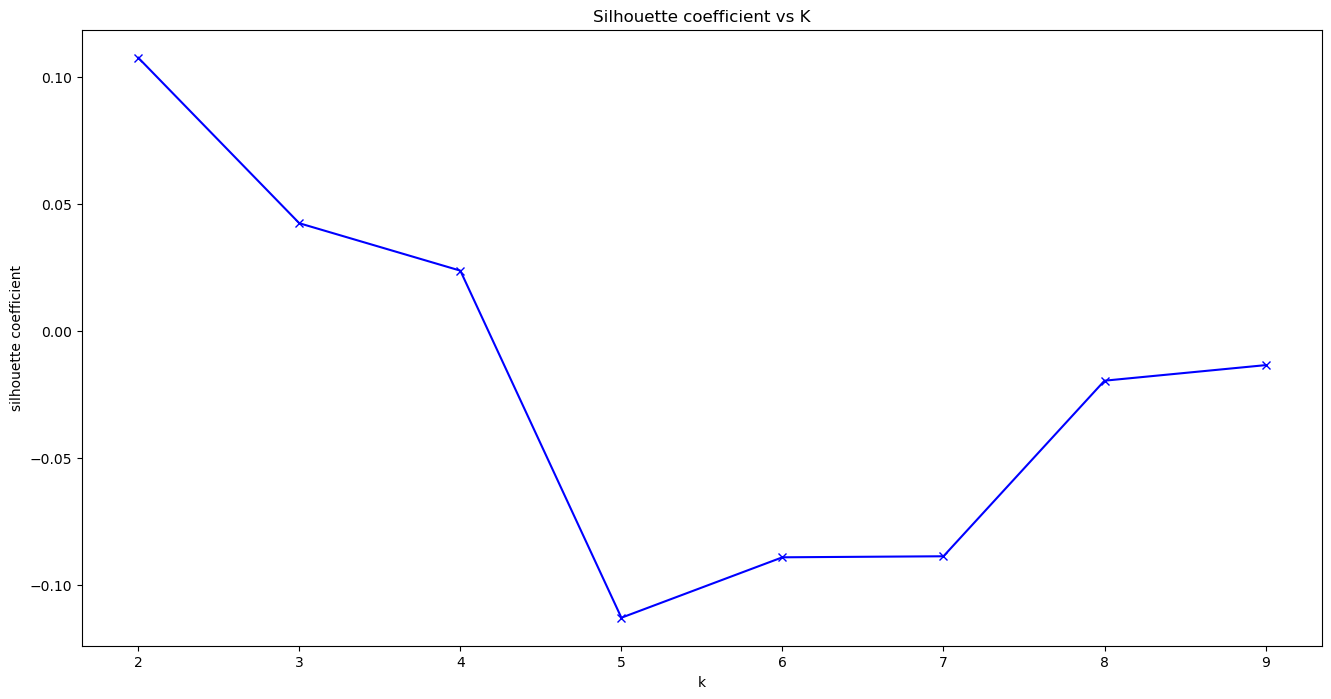

In [6]:
#Silhouette Method
from sklearn.metrics import silhouette_score

silhouettes = []
K = range(2,10) #run K-means with K ranging from 2 to 10
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df_scaled)
    label=kmeanModel.predict(df_scaled)
    silhouettes.append(silhouette_score(df_scaled,label))
    
# plot silhouette
plt.figure(figsize=(16,8))
plt.plot(K, silhouettes, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette coefficient')
plt.title('Silhouette coefficient vs K')
plt.show()

In [7]:
model = KMeans()
model.fit(df_scaled)

KMeans()

In [8]:
import pandas as pd
from sklearn.decomposition import PCA

# #reducing the features to 2 dimensions

# Extract the selected columns as the feature matrix
X = df_scaled

# Create an instance of PCA and specify the number of components
pca = PCA(n_components=2)

# Fit the PCA model to the data and transform the data to the new feature space
X_pca = pca.fit_transform(X)

# Create a DataFrame for the transformed data
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

# Print the transformed data
df_pca.head()

,PC1,PC2
0,0.709794,1.803278
1,0.147537,-0.699125
2,0.015315,-0.400959
3,2.724616,-0.524067
4,0.612601,0.185791


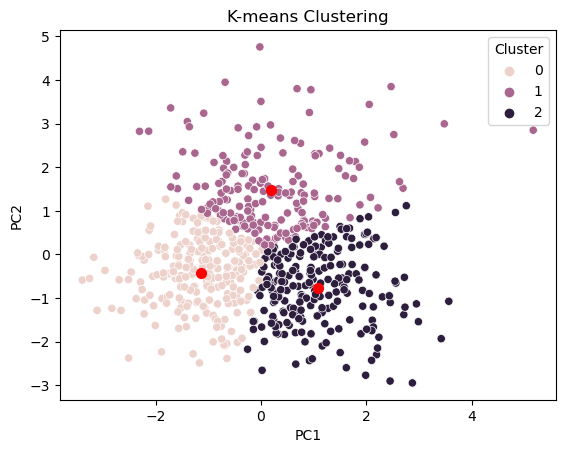

In [9]:
# Extract the selected columns as the feature matrix
X = df_pca

# Specify the number of clusters (K)
n_clusters = 3

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_pca)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Define a color palette for the clusters
cluster_colors = ["red", "green", "blue", "yellow"]  # Add more colors if needed

# Get the cluster centroids
cluster_centers = kmeans.cluster_centers_

# Add cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Visualize the clustering results
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca)

# Plot the cluster centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='o', s=50)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')

# Display the plot
plt.show()

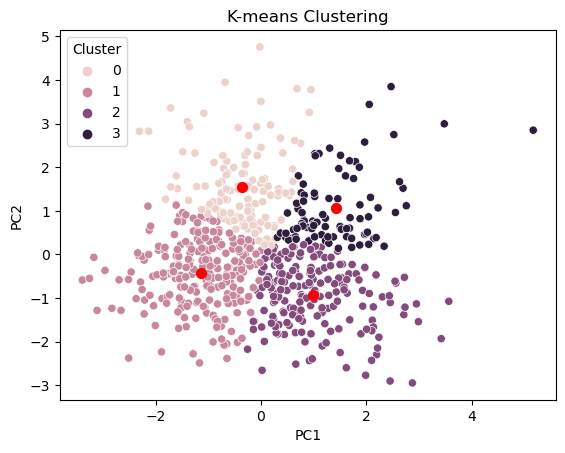

In [10]:
# Extract the selected columns as the feature matrix
X = df_pca

# Specify the number of clusters (K)
n_clusters = 4

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_pca)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Define a color palette for the clusters
cluster_colors = ["red", "green", "blue", "yellow"]  # Add more colors if needed

# Get the cluster centroids
cluster_centers = kmeans.cluster_centers_

# Add cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Visualize the clustering results
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca)

# Plot the cluster centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='o', s=50)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')

# Display the plot
plt.show()

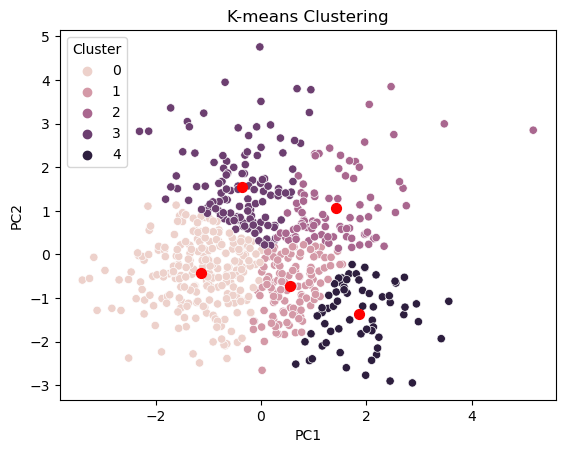

In [11]:
# Extract the selected columns as the feature matrix
X = df_pca

# Specify the number of clusters (K)
n_clusters = 5

# Perform K-means clustering
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df_pca)

# Get the cluster labels assigned to each data point
cluster_labels = kmeans.labels_

# Define a color palette for the clusters
cluster_colors = ["red", "green", "blue", "yellow"]  # Add more colors if needed

# Get the cluster centroids
cluster_centers = kmeans.cluster_centers_

# Add cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Visualize the clustering results
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca)

# Plot the cluster centroids
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='o', s=50)

# Add labels and title
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-means Clustering')

# Display the plot
plt.show()

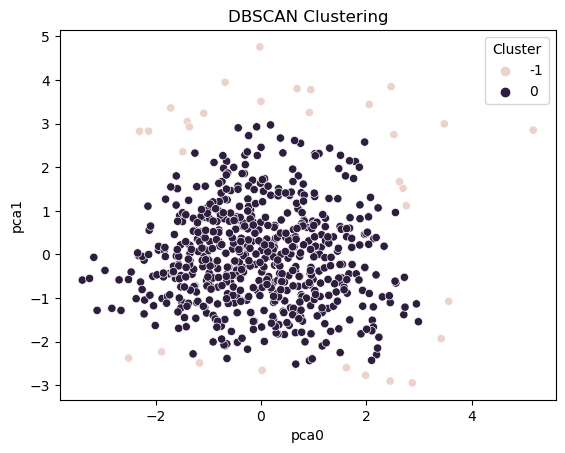

In [13]:
# plot DBSCAN clustering

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN



# Select the columns for clustering
selected_columns = ['PC1', 'PC2']

# Extract the selected columns as the feature matrix
X = df_pca[selected_columns]

# Set the parameters for DBSCAN
eps = 0.5  # The maximum distance between two samples to be considered as in the same neighborhood
min_samples = 5  # The minimum number of samples in a neighborhood for a point to be considered as a core point

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
cluster_labels = dbscan.fit_predict(X)

# Add cluster labels to the DataFrame
df_pca['Cluster'] = cluster_labels

# Visualize the clustering results
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df_pca)

# Add labels and title
plt.xlabel('pca0')
plt.ylabel('pca1')
plt.title('DBSCAN Clustering')

# Display the plot
plt.show()

In [14]:
#reprint encoded and scaled data
df_scaled.head()

,cust_id,income,age,years_with_bank,nbr_children,city_name_Albuquerque,city_name_Anaheim,city_name_Arlington,city_name_Atlanta,city_name_Austin,...,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita,gender_M
0,-1.713821,1.303330,-0.505884,-0.303070,1.180344,-0.104993,-0.119239,-0.039498,-0.055902,-0.125789,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,1.188921
1,-1.700297,-0.580153,-0.028816,-0.674388,-0.632529,-0.104993,-0.119239,-0.039498,-0.055902,-0.125789,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
2,-1.696916,0.002690,-0.929945,0.068249,-0.632529,-0.104993,-0.119239,-0.039498,-0.055902,-0.125789,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
3,-1.693535,-0.550266,1.773444,0.810885,-0.632529,-0.104993,-0.119239,-0.039498,-0.055902,-0.125789,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,-0.841099
4,-1.690154,-0.739182,1.508406,-1.045707,-0.632529,-0.104993,-0.119239,-0.039498,-0.055902,-0.125789,...,-0.088596,-0.088596,-0.055902,-0.088596,-0.104993,-0.104993,-0.039498,-0.097129,-0.055902,1.188921


In [ ]:
#these are the coefficients used for each PC (in the linear combination calculation).
pca.components_

In [15]:
df_encoded.head()

,cust_id,income,age,years_with_bank,nbr_children,city_name_Albuquerque,city_name_Anaheim,city_name_Arlington,city_name_Atlanta,city_name_Austin,...,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita,gender_M
0,1362480,50890,33,3,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1362484,10053,42,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1362485,22690,25,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1362486,10701,76,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1362487,6605,71,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# Radar plots
# Return to KMeans with k = 3
# Instantiate
model_KMeans = KMeans(n_clusters = 3)
X = df_scaled
labels = None
# Train
labels = model_KMeans.fit_predict(X)
# Get mean cluster samples
cluster_0_means = df_encoded[labels == 0].mean()
cluster_1_means = df_encoded[labels == 1].mean()
cluster_2_means = df_encoded[labels == 2].mean()
cluster_means = pd.DataFrame([cluster_0_means, cluster_1_means, cluster_2_means])
cluster_means

,cust_id,income,age,years_with_bank,nbr_children,city_name_Albuquerque,city_name_Anaheim,city_name_Arlington,city_name_Atlanta,city_name_Austin,...,city_name_St Louis,city_name_St Paul,city_name_Tampa,city_name_Toledo,city_name_Tucson,city_name_Tulsa,city_name_Virginia Beach,city_name_Washington,city_name_Wichita,gender_M
0,1.362817e+06,18550.916667,57.250000,4.333333,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
1,1.362991e+06,22258.720065,42.169903,3.788026,0.716828,0.011327,0.014563,0.001618,0.003236,0.016181,...,0.008091,0.008091,0.003236,0.008091,0.011327,0.011327,0.001618,0.009709,0.003236,0.411003
2,1.362955e+06,45919.333333,47.083333,4.750000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000


In [22]:
demo_data['city_name'].unique()

array(['New York City', 'Denver', 'Dallas', 'Los Angeles', 'Nashville',
       'Houston', 'Long Beach', 'San Francisco', 'St Louis',
       'Indianapolis', 'Tulsa', 'Chicago', 'Louisville', 'Lexington',
       'Charlotte', 'Riverside', 'Oakland', 'Albuquerque', 'Philadelphia',
       'Sacramento', 'Norfolk', 'Oklahoma City', 'Seattle', 'Cleveland',
       'Dayton', 'Phoenix', 'Honolulu', 'El Paso', 'Fort Worth', 'Mesa',
       'Miami', 'Washington', 'Santa Ana', 'Tucson', 'Rochester',
       'Corpus Christi', 'Detroit', 'New Orleans', 'Minneapolis',
       'San Diego', 'Portland', 'Las Vegas', 'Atlanta', 'Tampa',
       'San Jose', 'Newark', 'Memphis', 'Milwaukee', 'Columbus',
       'Anaheim', 'Kansas City', 'Colorado Springs', 'Pittsburgh',
       'Jacksonville', 'Birmingham', 'Baltimore', 'Boston', 'Fresno',
       'Wichita', 'Cincinnati', 'Austin', 'San Antonio', 'Omaha',
       'Arlington', 'St Paul', 'Jersey City', 'Toledo', 'Buffalo',
       'Virginia Beach'], dtype=object)

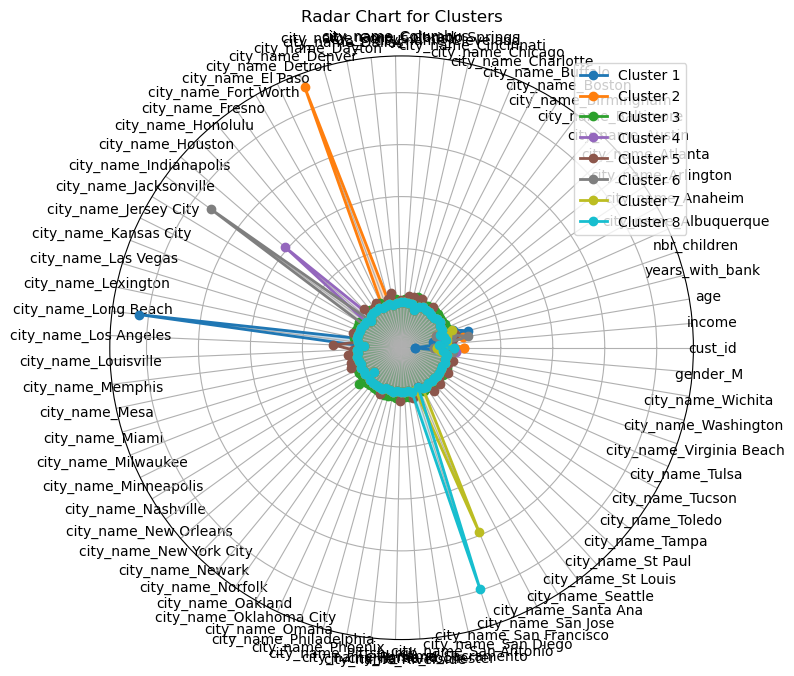

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you have already trained the K-means model and obtained cluster centers and feature names
cluster_centers = model.cluster_centers_
feature_names = cluster_means.columns

# Function to plot radar chart
def plot_radar_chart(cluster_centers, feature_names):
    categories = feature_names
    num_clusters = cluster_centers.shape[0]
    num_features = cluster_centers.shape[1]

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]

    # Create a figure and polar axis
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, polar=True)

    # Set color palette for clusters
    color_palette = plt.cm.get_cmap('tab10', num_clusters)

    # Plot radar chart for each cluster
    for i in range(num_clusters):
        values = cluster_centers[i].tolist()
        values += [values[0]]
        ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {i + 1}', color=color_palette(i))
        ax.fill(angles, values, alpha=0.25, color=color_palette(i))

    # Set the labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add legend
    ax.legend(loc='upper right')

    # Set the title
    ax.set_title('Radar Chart for Clusters')

    # Fill the area with a grid
    ax.grid(True)

    # Remove y-axis labels
    ax.set_yticklabels([])

    # Adjust the subplot layout
    fig.tight_layout()

    # Show the plot
    plt.show()

# Plot radar chart for clusters
plot_radar_chart(cluster_centers, feature_names)


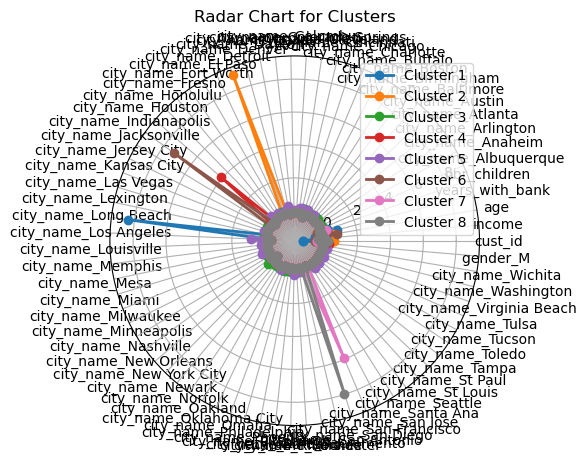

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans



# Get cluster centers and feature names
cluster_centers =model.cluster_centers_
feature_names = cluster_means.columns


# Function to plot radar chart
def plot_radar_chart(cluster_centers, feature_names):
    categories = feature_names
    num_clusters = cluster_centers.shape[0]
    num_features = cluster_centers.shape[1]

    angles = np.linspace(0, 2 * np.pi, num_features, endpoint=False).tolist()
    angles += angles[:1]

    # Create a figure and polar axis
    fig = plt.figure()
    ax = fig.add_subplot(111, polar=True)

    # Plot radar chart for each cluster
    for i in range(num_clusters):
        values = cluster_centers[i].tolist()
        values += [values[0]]
        ax.plot(angles, values, 'o-', linewidth=2, label=f'Cluster {i + 1}')
        ax.fill(angles, values, alpha=0.25)

    # Set the labels for each axis
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)

    # Add legend
    ax.legend(loc='upper right')

    # Set the title
    ax.set_title('Radar Chart for Clusters')

    # Fill the area with a grid
    ax.grid(True)

    # Show the plot
    plt.show()

# Plot radar chart for clusters
plot_radar_chart(cluster_centers, feature_names)